In [1]:
# iris 데이터 읽기
# 150개의 데이터
import pandas as pd
data = pd.read_csv('iris.csv')

print(len(data))
print(data[:5])

150
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
0            5.1           3.5            1.4           0.2  Setosa
1            4.9           3.0            1.4           0.2  Setosa
2            4.7           3.2            1.3           0.2  Setosa
3            4.6           3.1            1.5           0.2  Setosa
4            5.0           3.6            1.4           0.2  Setosa


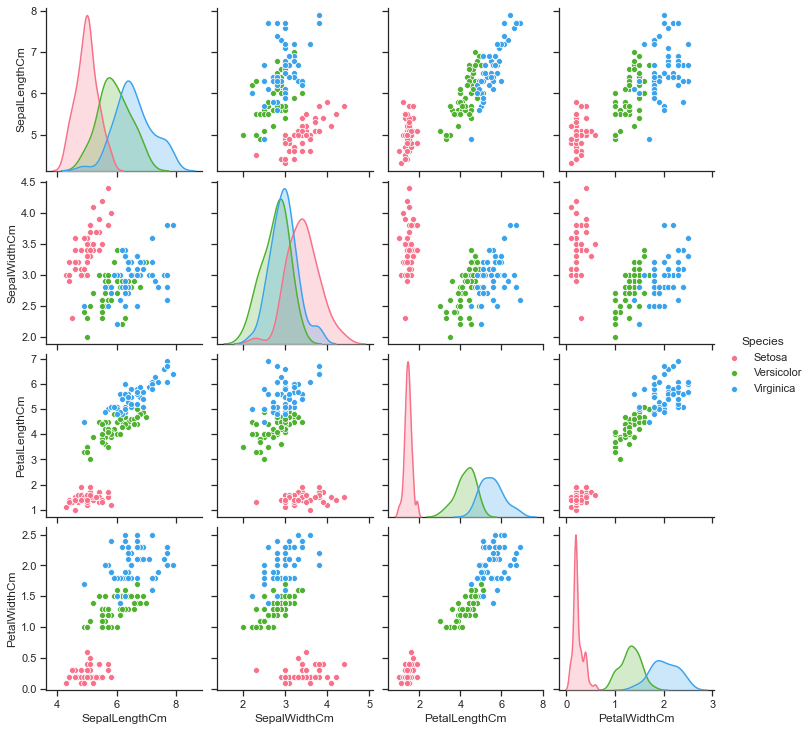

In [2]:
# iris 데이터 플로팅
# 읽은 데이터의 특성을 그림으로 나타냄
import seaborn as sns

sns.set(style = "ticks", color_codes = True)
g = sns.pairplot(data, hue = "Species", palette = "husl")

In [4]:
# 입력 데이터 변환
# 출력 유형을 [0, 1, 2]의 숫자로 변환
data['Species'] = data['Species'].replace(['Virginica', 'Setosa', 'Versicolor'], [0, 1, 2])

from sklearn.model_selection import train_test_split
data_X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
# y 데이터에 해당됩니다.
data_y = data['Species'].values
print(data_X[:5]) # X에 해당되는 데이터를 5개만 출력
print(data_y[:5]) # y에 해당되는 데이터를 5개만 출력

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[1 1 1 1 1]


In [5]:
# 데이터 분리와 one-hot 인코딩 수행
# 150개 데이터를 훈련용(80%)과 시험용(20%)으로 분리
# 출력값을 one-hot 인코딩 형태로 변환
# 훈련 데이터와 테스트 데이터를 8:2로 나누고 순서 섞기.

(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size = 0.8, random_state = 1)

from tensorflow.keras.utils import to_categorical

# 훈련 데이터와 테스트 데이터에 대해서 one-hot 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
# 신경망 훈련 수행
# Sequential API 방식 이용
# 4x3 크기의 Dense 구조 사용

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

model = Sequential()
model.add(Dense(3, input_dim = 4, activation = 'softmax'))
sgd = optimizers.SGD(lr = 0.01) # learning rate = 0.01
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam',
              metrics = ['accuracy'])

# 옵티마이저는 경사하강법의 일종인 adam을 사용
# 손실 함수(Loss function)는 크로스 엔트로피 함수 사용

history = model.fit(X_train, y_train, batch_size = 1, epochs = 200,
                    validation_data = (X_test, y_test))

Epoch 1/200
120/120 [==============================] - 0s 2ms/step - loss: 2.7483 - accuracy: 0.3083 - val_loss: 2.3593 - val_accuracy: 0.4333
Epoch 2/200
120/120 [==============================] - 0s 831us/step - loss: 1.8055 - accuracy: 0.5167 - val_loss: 1.8509 - val_accuracy: 0.5667
Epoch 3/200
120/120 [==============================] - 0s 989us/step - loss: 1.4217 - accuracy: 0.5417 - val_loss: 1.5458 - val_accuracy: 0.4000
Epoch 4/200
120/120 [==============================] - 0s 1ms/step - loss: 1.2012 - accuracy: 0.5167 - val_loss: 1.3508 - val_accuracy: 0.2333
Epoch 5/200
120/120 [==============================] - 0s 823us/step - loss: 1.0766 - accuracy: 0.4250 - val_loss: 1.2287 - val_accuracy: 0.2333
Epoch 6/200
120/120 [==============================] - 0s 731us/step - loss: 0.9954 - accuracy: 0.4000 - val_loss: 1.1368 - val_accuracy: 0.2333
Epoch 7/200
120/120 [==============================] - 0s 765us/step - loss: 0.9312 - accuracy: 0.4250 - val_loss: 1.0609 - val_accura

120/120 [==============================] - 0s 1ms/step - loss: 0.2263 - accuracy: 0.9500 - val_loss: 0.2622 - val_accuracy: 0.9667
Epoch 114/200
120/120 [==============================] - 0s 923us/step - loss: 0.2242 - accuracy: 0.9583 - val_loss: 0.2393 - val_accuracy: 0.9667
Epoch 115/200
120/120 [==============================] - 0s 706us/step - loss: 0.2222 - accuracy: 0.9667 - val_loss: 0.2405 - val_accuracy: 1.0000
Epoch 116/200
120/120 [==============================] - 0s 706us/step - loss: 0.2222 - accuracy: 0.9500 - val_loss: 0.2401 - val_accuracy: 1.0000
Epoch 117/200
120/120 [==============================] - 0s 698us/step - loss: 0.2181 - accuracy: 0.9583 - val_loss: 0.2583 - val_accuracy: 0.9667
Epoch 118/200
120/120 [==============================] - 0s 690us/step - loss: 0.2185 - accuracy: 0.9667 - val_loss: 0.2418 - val_accuracy: 1.0000
Epoch 119/200
120/120 [==============================] - 0s 698us/step - loss: 0.2167 - accuracy: 0.9583 - val_loss: 0.2365 - val_accu

Epoch 169/200
120/120 [==============================] - 0s 748us/step - loss: 0.1718 - accuracy: 0.9500 - val_loss: 0.1932 - val_accuracy: 1.0000
Epoch 170/200
120/120 [==============================] - 0s 1ms/step - loss: 0.1712 - accuracy: 0.9583 - val_loss: 0.1993 - val_accuracy: 1.0000
Epoch 171/200
120/120 [==============================] - 0s 2ms/step - loss: 0.1700 - accuracy: 0.9583 - val_loss: 0.1977 - val_accuracy: 1.0000
Epoch 172/200
120/120 [==============================] - 0s 723us/step - loss: 0.1704 - accuracy: 0.9667 - val_loss: 0.1906 - val_accuracy: 1.0000
Epoch 173/200
120/120 [==============================] - 0s 1ms/step - loss: 0.1684 - accuracy: 0.9500 - val_loss: 0.1938 - val_accuracy: 1.0000
Epoch 174/200
120/120 [==============================] - 0s 1ms/step - loss: 0.1681 - accuracy: 0.9667 - val_loss: 0.1883 - val_accuracy: 1.0000
Epoch 175/200
120/120 [==============================] - 0s 731us/step - loss: 0.1694 - accuracy: 0.9500 - val_loss: 0.1832 - 

In [ ]:
# 전체 프로그램


### IMDB 영화평 긍정/부정 분류

IMDB 데이터
- Internet Movie Database에는 일반인들의 영화평 50,000개가 저장되어 있음
- 영화평은 텍스트로 구성되는데 긍정 또는 부정의 태그가 붙어있음
- 여기서는 영화평 텍스트로부터 평가가 긍정인지 부정인지 추정하는 것이 과제
- 이 프로그램과 설명은 Deep Learning with Python 3장에 있다.

IMDB 데이터 읽기
- IMDB 데이터는 keras에서 읽을 수 있음
- 아래 프로그램에서는 텍스트에서 사용하는 단어수를 10,000개로 제한하고 있음

  from keras.datasets import imdb \n
  
  (train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

- keras에서는 전체 데이터에서 단어 빈도수를 조사하고 상위 10,000개의 단어를 사용해서 각 리뷰를 숫자 리스트로 표시
- 숫자 리스트 데이터로는 무슨 내용인지 알 수 없음
  train_data에서는 내용은 몰라도 각 리뷰가 숫자로 나타나는 것 같다.
  train_labels에서는 평가가 긍정적인지 부정적인지 보는 것 같다. 1이면 긍정.

In [8]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 1s 0us/step


In [12]:
# IMDB 텍스트 보기. 
# 리뷰 내용을 보려면 get_word_index 함수를 이용

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])


In [15]:
# 입력 데이터 변환

import numpy as np
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_lables).astype('float32')
y_test =np.asarray(test_labels).astype('float32')

NameError: name 'train_lables' is not defined

In [16]:
# 신경망 구조
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense( 1, activation = 'sigmoid'))

In [17]:
# 신경망 훈련 구조
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)

results = model.evaluate(x_test, y_test)

ValueError: Data cardinality is ambiguous:
  x sizes: 25000
  y sizes: 120
Please provide data which shares the same first dimension.

In [19]:
# 전체 프로그램

from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

import numpy as np
# 입력 텍스트 vectorization
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense( 1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 18ms/step - loss: 0.4462 - accuracy: 0.8226
Epoch 2/4
49/49 [==============================] - 1s 18ms/step - loss: 0.2569 - accuracy: 0.9100
Epoch 3/4
49/49 [==============================] - 1s 16ms/step - loss: 0.1974 - accuracy: 0.9305
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2942 - accuracy: 0.8840


### 한글 Word2Vec 벡터 훈련

한글 Word2Vec 모델 훈련
- 한글의 경우 임베딩 벡터 추출시 좌들의 영향을 배제하기 위해 훈련시 이들을 제거하는 것이 좋음
- 여기서는 교재 예제로 나와 있는 한국어 위키피디아 데이터를 이용함.(교재 10.3절)
- Word2Vec 훈련은 gensim 패키지를 이용

훈련 데이터 전처리 하기
- 형태소 분석기 Okt를 사용하여 명사 데이터만 추출하여 훈련 데이터를 구성
- 큰 파일에 대한 처리 시간이 많이 소요되므로 일부분만으로 연습하는 것이 좋음.

In [ ]:
# 녹화본 보면서 진행해야 할 듯...?
# python -m wikiextractor.WikiExtractor <dump file> 이 뭔지 모르겠음